[['E', 'a'], ['200', '-3.7381168221280654'], ['250', '-3.7398911325993938'], ['300', '-3.7407529906360972'], ['350', '-3.7411664659572557'], ['400', '-3.7414221057331853'], ['450', '-3.7415307335567354'], ['500', '-3.7415464686281434']]


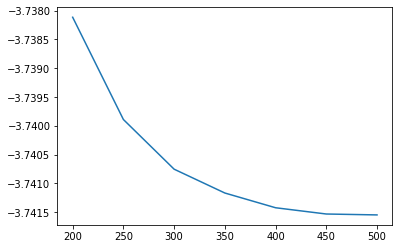

In [12]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
file = open("data_pw_mode.csv", "r")
data = list(csv.reader(file, delimiter=","))
file.close()
print(data)
x = list(pd.read_csv('data_pw_mode.csv')['E'])
y = list(pd.read_csv('data_pw_mode.csv')['a'])
plt.plot(x,y)

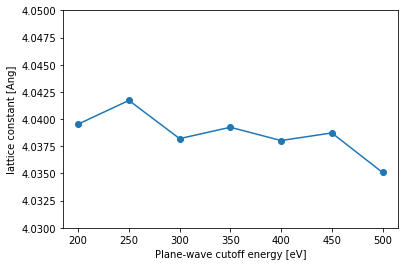

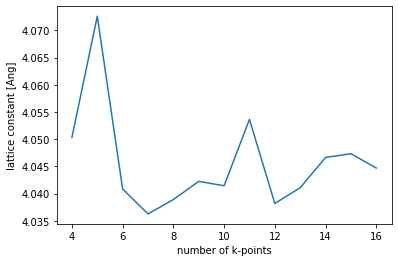

In [13]:
# web-page: Al_conv_ecut.png, Al_conv_k.png
import matplotlib.pyplot as plt

from ase.eos import EquationOfState
from ase.io import read


def fit(filename):
    configs = read(filename + '@:')
    volumes = [a.get_volume() for a in configs]
    energies = [a.get_potential_energy() for a in configs]
    eos = EquationOfState(volumes, energies)
    v0, e0, B = eos.fit()
    return (4 * v0)**(1 / 3.0)


cutoffs = range(200, 501, 50)
a = [fit(f'Al-{ecut}.txt') for ecut in cutoffs]
plt.figure(figsize=(6, 4))
plt.plot(cutoffs, a, 'o-')
plt.axis(ymin=4.03, ymax=4.05)
plt.xlabel('Plane-wave cutoff energy [eV]')
plt.ylabel('lattice constant [Ang]')
plt.savefig('Al_conv_ecut.png')

kpoints = range(4, 17)
plt.figure(figsize=(6, 4))
a = [fit(f'Al-{k:02}.txt') for k in kpoints]
plt.plot(kpoints, a, '-')
plt.xlabel('number of k-points')
plt.ylabel('lattice constant [Ang]')
plt.savefig('Al_conv_k.png')